# Représentation vectorielle des signaux

In [1]:
from myst_nb import glue
import math
from numpy import arange, array, zeros
from matplotlib.pyplot import figure, plot, show, subplot, title, xlabel, ylabel, xlim, ylim, arrow, grid

Un signal qui est échantillonné et à temps limité (c'est-à-dire nul ou non défini en dehors d'un intervalle) peut tout simplement se représenter par une séquence finie de valeurs numériques. Dans le cas d'un signal $x$ défini sur $N$ échantillons, le signal est équivalent à un vecteur :

$$
  x = [ x_0 \, x_1 \, \dots \, x_{N-1} ]
$$

où les $x_n$ sont les échantillons du signal.
On notera $x\in\mathbb{R}^N$ pour signifier que $x$ est un signal échantillonné à temps limité de $N$ échantillons à valeurs réelles.

Notez que, par convention, le premier échantillon est indexé par 0.

L'équivalence entre signal échantillonné à temps limité et vecteur a plusieurs intérêts :
* on peut utiliser des outils de l'algèbre linéaire pour faire du traitement du signal ;
* on peut faire des interprétations géométriques ;
* c'est l'interprétation qui est faite dans les logiciels et les langages de calcul numérique, comme en Python.

<div class="example">

L'échelon $u$ et l'impulsion $\delta$ s'écrivent dont dans $\mathbb{R}^2$ :

$$
  u = [ 1 \, 1]
  \qquad\text{et}\qquad
  \delta = [1 \, 0].
$$

Leur représentation est donnée {numref}`F:vect:ex-graphe`. Il s'agit simplement de deux signaux de deux échantillons. Les axes de cette représentation sont : les échantillons en abscisse, et les amplitude du signal en ordonnée.

```{glue:figure} G:vect:ex-graphe
:name: "F:vect:ex-graphe"

Représentation de l'échelon et de l'impulsion de taille 2 sous forme de signaux.
```

Par ailleurs, comme ces deux signaux peuvent s'interpréter comme des vecteurs, alors on peut les représenter comme tel, dans un espace à deux dimensions, comme dans la {numref}`F:vect:ex-espace`. Les axes de cette représentation sont : le premier échantillon du signal en abscisse, et le deuxième échantillon en ordonnée.

```{glue:figure} G:vect:ex-espace
:name: "F:vect:ex-espace"

Représentation de l'échelon et de l'impulsion de taille 2 sous forme de vecteurs.
```
    
</div>

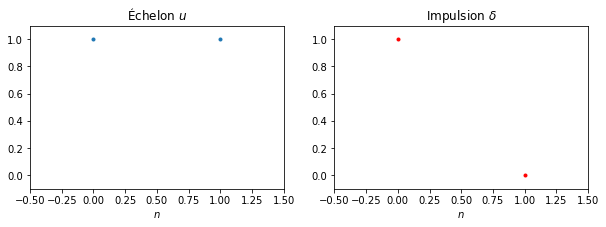

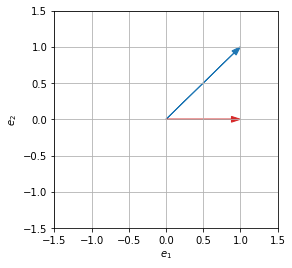

In [2]:
n = arange(2)
u = array([1, 1])
d = array([1, 0])

# Représentation sous forme de signaux
fig = figure(figsize=(10,3)) 
subplot(1,2,1)
plot(n, u, ".")
ylim([-.1, 1.1])
xlabel("$n$")
xlim([-.5, 1.5])
title("Échelon $u$")
subplot(1,2,2)
plot(n, d, "r.")
ylim([-.1, 1.1])
xlabel("$n$")
xlim([-.5, 1.5])
title("Impulsion $\delta$")
show()
glue("G:vect:ex-graphe", fig, display=False)

# Représentation sous forme de vecteurs
fig = figure(figsize=(4,4))
arrow(0, 0, u[0], u[1], head_width=0.08, length_includes_head=True, color="tab:blue")
arrow(0, 0, d[0], d[1], head_width=0.08, length_includes_head=True, color="tab:red")
xlim([-1.5, 1.5])
ylim([-1.5, 1.5])
xlabel("$e_1$")
ylabel("$e_2$")
grid()
show()
glue("G:vect:ex-espace", fig, display=False)

## Quelques définitions

On peut définir les mêmes outils que ceux de la géométrie euclidienne pour les signaux échantillonnés à temps limité.


### Produit scalaire

Le _produit scalaire_ entre deux signaux $x$ et $y$ de taille $N$ est (la notation $\cdot^*$ signifie conjugué) :

$$
  \langle x,y \rangle = \sum_{n=0}^{N-1} x_n y_n^*.
$$

### Orthogonalité

Deux signaux sont _orthogonaux_ si et seulement si leur produit scalaire est nul.

### Norme

La _norme_ d'un signal $x$ de taille $N$ est :

$$
  \|x\| = \sqrt{\langle x,x \rangle} = \sqrt{ \sum_{n=0}^{N-1} |x_n|^2 }.
$$

### Énergie

L'_énergie_ d'un signal de taille $N$ est le carré de sa norme :

$$
  \|x\|^2 = \sum_{n=0}^{N-1} |x_n|^2.
$$

### Distance

La _distance_ entre deux signaux $x$ et $y$ de taille $N$ est la norme de la différence :

$$
  \|x-y\| = \sqrt{ \sum_{n=0}^{N-1} |x_n-y_n|^2 }.
$$

### Erreur quadratique moyenne

L'_erreur quadratique moyenne_ (EQM) entre deux signaux $x$ et $y$ de taille $N$ est :

$$
  \mathrm{EQM} = \frac{1}{N}\|x-y\|^2.
$$

### Base

Une _base_ est un ensemble de $N$ signaux tels que tout signal échantillonné de taille $N$ peut s'écrire comme une combinaison linéaire unique de signaux de cette base. Ainsi, si $\{\varphi_0 \, \varphi_1 \, \dots \, \varphi_{N-1}\}$ est un ensemble de $N$ signaux formant une base, alors tout signal $x\in\mathbb{C}^N$ s'écrira

$$
  x = \sum_{k=0}^{N-1} \alpha_k \varphi_k
$$

où les $\alpha_k$ sont des coefficients uniques (il ne peut pas y avoir plusieurs jeux différents de coefficients $\{\alpha_k\}$).

Si en plus les vecteurs $\{\varphi_k\}$ de cette base sont orthogonaux deux à deux et de norme 1, alors la base est _orthonormée_.

<div class="example">

Pour $N=4$, les signaux $\delta[n-k]$ avec $k\in\{0,\dots,3\}$ forment une base, qui plus est orthonormée.

```{glue:figure} G:vect:base-canonique
:name: "F:vect:base-canonique"

Base canonique dans $\mathbb{R}^4$.
```

Nous ne représentons pas ces quatre signaux sous forme de vecteur, car cela nécessite de les représenter dans un espace à quatre dimensions (or, votre écran n'en a que deux).

Cette base est d'ailleurs appelée _base canonique_ car c'est la base naturelle pour représenter les signaux. En effet, les échantillons de tout signal de taille $N$ correspondent aux coefficients $\alpha_k$.
    
</div>

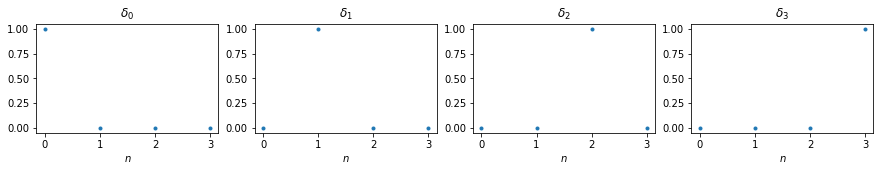

In [3]:
N = 4
n = arange(N)
fig = figure(figsize=(15,2)) 
for k in range(N):
    subplot(1,N,k+1)
    phi = zeros(N)
    phi[k] = 1
    plot(n, phi, ".")
    xlabel("$n$")
    title(f"$\delta_{k}$")

glue("G:vect:base-canonique", fig, display=False)

## Décomposition sur une base

Parfois, il est intéressant de représenter les signaux dans une autre base que la base canonique : on parle alors de _décomposition_ ou de _projection_ d'un signal $x$ sur une base.
La transformée de Fourier peut être vue comme la décomposition de signaux dans une autre base.
De même, les techniques de compression (audio, image ou vidéo) utilisent astucieusement une décomposition dans une base particulière pour réduire le poids des données.
Les coefficients du signal dans cette nouvelle base vont donc être différent des coefficients de la base canonique.

La décomposition d'un signal $x$ de taille $N$ dans une base orthonormée $\{\varphi_k\}$, et donc le calcul des nouveaux coefficients $\alpha_k$, s'obtient en calculant le produit scalaire de $x$ avec chaque élément $\varphi_k$ de la base :

$$
  \forall k \in \{0,\dots,N-1\},\quad
  \alpha_k = \langle x, \varphi_k \rangle.
$$

La _reconstruction_ du signal $x$ consiste à réécrire le signal dans la base canonique depuis la base $\{\varphi_k\}$. Pour cela, le signal $x$ s'obtient par la somme des éléments de la base $\varphi_k$ pondérés par les coefficients $\alpha_k$ :

$$
  x = \sum_{k=0}^{N-1} \alpha_k \varphi_k.
$$